# Supervised Learning - Model Selection
## Part 2 of 2

In [ ]:
# run to set up Google Colab Environment
!pip install pycaret

In [2]:
# display interactive visuals
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [3]:
import pandas as pd
import numpy as np
from datetime import datetime

from pycaret.regression import *

In [4]:
# ensure data file is in colab directory before running this cell
df = pd.read_csv('model_data_v1.csv')

In [5]:
df.shape

(8759, 166)

## Model Selection with PyCaret

In [6]:
# set up experiment with all available features
exp = setup(data = df, target = 'Hourly Energy Cons (kWh)')

,Description,Value
0,session_id,3468
1,Target,Hourly Energy Cons (kWh)
2,Original Data,"(8759, 166)"
3,Missing Values,False
4,Numeric Features,62
5,Categorical Features,103
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(6131, 894)"


In [7]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2.573200e+00,1.229380e+01,3.504100e+00,9.234000e-01,0.1697,1.289000e-01,0.614
rf,Random Forest Regressor,2.631300e+00,1.328290e+01,3.641900e+00,9.172000e-01,0.1737,1.338000e-01,28.396
omp,Orthogonal Matching Pursuit,2.740900e+00,1.356910e+01,3.682000e+00,9.155000e-01,0.1783,1.359000e-01,0.122
br,Bayesian Ridge,2.823700e+00,1.357770e+01,3.683100e+00,9.154000e-01,0.1786,1.421000e-01,1.956
et,Extra Trees Regressor,2.641300e+00,1.362840e+01,3.686800e+00,9.151000e-01,0.1775,1.354000e-01,30.600
ridge,Ridge Regression,2.830500e+00,1.372410e+01,3.703100e+00,9.145000e-01,0.1778,1.422000e-01,0.119
gbr,Gradient Boosting Regressor,2.983500e+00,1.670120e+01,4.083400e+00,8.960000e-01,0.1907,1.464000e-01,7.484
lr,Linear Regression,3.045600e+00,1.708230e+01,4.120900e+00,8.938000e-01,0.1903,1.518000e-01,0.691
dt,Decision Tree Regressor,3.096200e+00,2.416000e+01,4.911500e+00,8.497000e-01,0.2292,1.539000e-01,0.505
ada,AdaBoost Regressor,5.181600e+00,3.665060e+01,6.051800e+00,7.725000e-01,0.2841,2.726000e-01,7.002


In [8]:
# create random forest model
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.6743,13.2941,3.6461,0.9210,0.1801,0.1362
1,2.6341,12.7951,3.5770,0.9208,0.1700,0.1350
2,2.5900,12.4788,3.5325,0.9233,0.1713,0.1283
3,2.5961,12.9460,3.5981,0.9236,0.1753,0.1314
4,2.7097,15.6346,3.9541,0.8962,0.1815,0.1344
5,2.6255,13.2431,3.6391,0.9181,0.1715,0.1325
6,2.5424,12.1328,3.4832,0.9152,0.1737,0.1348
7,2.5997,12.3426,3.5132,0.9297,0.1689,0.1360
8,2.6491,14.6918,3.8330,0.9038,0.1749,0.1352
9,2.6921,13.2703,3.6428,0.9207,0.1704,0.1344


In [9]:
# create light gradient boost model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.6673,12.5009,3.5357,0.9258,0.1847,0.1351
1,2.6030,12.5779,3.5465,0.9221,0.1638,0.1312
2,2.6043,12.8003,3.5777,0.9213,0.1808,0.1259
3,2.5078,11.4055,3.3772,0.9327,0.1777,0.1259
4,2.6138,14.0796,3.7523,0.9065,0.1826,0.1275
5,2.5669,11.7637,3.4298,0.9273,0.1602,0.1276
6,2.5716,11.5148,3.3933,0.9195,0.1658,0.1323
7,2.4592,11.1496,3.3391,0.9365,0.1569,0.1263
8,2.5714,13.1827,3.6308,0.9137,0.1665,0.1307
9,2.5670,11.9624,3.4587,0.9285,0.1579,0.1262


Mean model scores are consistent with compare_models(), light gradient boost performs the best.

Random forest model is not tuned because of super long train time (> 2hrs) for very little to no benefits.

In [10]:
# tune light gradient boost model
# tuning actually decreases perfomance, so I will use the initial lgb model
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.1385,16.7099,4.0878,0.9008,0.1974,0.1606
1,2.9638,15.0116,3.8745,0.9071,0.1858,0.1505
2,2.8949,14.8088,3.8482,0.9090,0.1854,0.1470
3,2.8929,15.4284,3.9279,0.9090,0.1861,0.1504
4,2.9162,16.2645,4.0329,0.8920,0.1856,0.1463
5,2.9395,14.7985,3.8469,0.9085,0.1825,0.1479
6,2.9617,15.2776,3.9087,0.8932,0.1979,0.1524
7,3.0303,16.5239,4.0650,0.9059,0.1898,0.1531
8,2.9923,16.7141,4.0883,0.8906,0.1931,0.1546
9,2.9036,14.1104,3.7564,0.9157,0.1798,0.1466


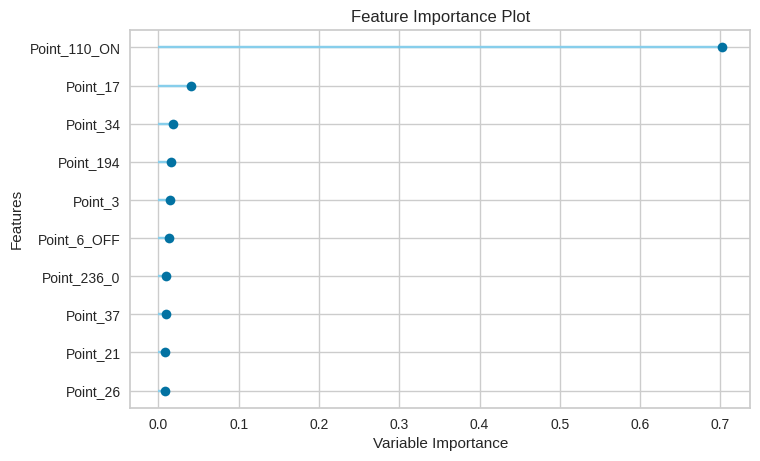

In [11]:
# feature importnace plot for random forest model
plot_model(rf, plot='feature')

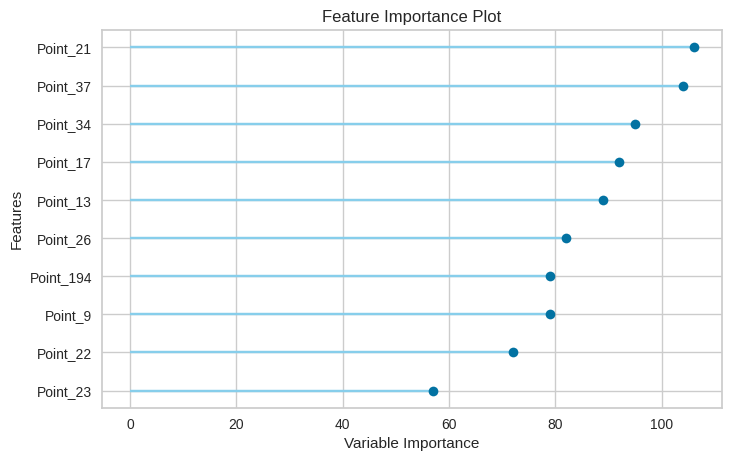

In [12]:
# feature importance plot for light gradient boost model
plot_model(lightgbm, plot='feature')

In [13]:
# interactive plot to explore various results, mainly hyperparameters and validation curve
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Top models, Random Forest and Light Gradient Boosting Machine, will be created and tested in sklearn to try to achieve comparable R2 scores and MAE.
Feature importance plot will be used to choose features initially, with iterations to follow. Feature importance rankings will be compared. 